Complete implementation of K-means algorythm to find clusters in N dimensional data as function.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Algorythm

In [2]:
class My_KMeans():
    """
    class only for finding centroids of clusters
    """
    def __init__(self, n_clusters=8, n_init=10, n_iter=5, dist_func="eucl"):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.dist_func = self.manh if dist_func == "manh" else self.eucl
        
        
    def fit(self, df):
        """
        K-means clustering algorythm

        input:
        df: pandas.DataFrame
        """
        # Saving variables for later
        n_datapoints = df.shape[0]
        minn = df.min()
        maxx = df.max()
        best_centroids = (np.inf, None, None)

        # Creating array of distances from points to centroids
        dist_to_centroids = np.empty(shape=(n_datapoints, self.n_clusters))

        # Finding lowest variance
        for _ in range(self.n_init):

            # Inicializing centroids
            my_centroids = np.random.uniform(low=minn, high=maxx, size=(self.n_clusters, data.shape[1]))
            my_centroids_df = pd.DataFrame(my_centroids)

            # Finding optimum centroids
            for _ in range(self.n_iter):

                # Calculating Euclidean distance from points to centroids
                for i in range(self.n_clusters):
                    for j in range(n_datapoints):
                        dist_to_centroids[j][i] = self.dist_func(df.iloc[j], my_centroids_df.iloc[i])
                dist_df = pd.DataFrame(dist_to_centroids)
                labels = dist_df.idxmin(axis=1)

                # Updating centroids
                my_new_centroids_df = df.groupby(by=labels).mean()
                missing_indexes = list(set(range(self.n_clusters)) - set(my_new_centroids_df.index))
                missing_rows = my_centroids_df.loc[missing_indexes]
                my_centroids_df = pd.concat([my_new_centroids_df, missing_rows])
                my_centroids_df = my_centroids_df.sort_index()

            variation = df.groupby(by=labels).var().mean().mean() # lower = better
            if variation < best_centroids[0]:
                best_centroids = variation, my_centroids_df, labels

        self.cluster_centers_ = best_centroids[1]
        self.labels_ = best_centroids[2]
    
    
    def eucl(self, p1, p2):
        """
        Calculates euclidean distance between 2 points in N dimensional space
        """
        summ = 0
        for x, y in zip(p1, p2):
            summ += (x - y)**2
    
        return np.sqrt(summ)


    def manh(self, p1, p2):
        """
        Calculates manhattan distance between 2 points in N dimensional space
        """
        summ = 0
        for x, y in zip(p1, p2):
            summ += np.abs(x - y)
    
        return summ

# Creating Data

In [3]:
from sklearn.datasets import make_blobs

data, _, real_centroids = make_blobs(n_samples=300, n_features=2, centers=5, return_centers=2, center_box=(-20,20))

# Converting to dataframe
df = pd.DataFrame(data)

# Plotting Data

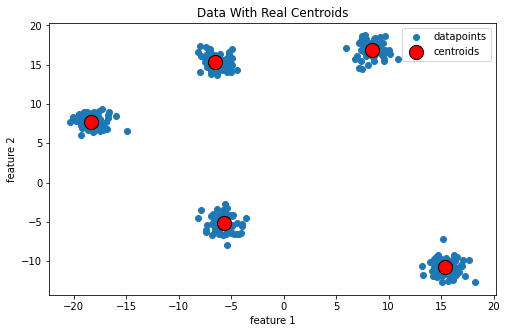

In [4]:
plt.figure(figsize=(8,5))
plt.title("Data With Real Centroids")
plt.scatter(df.iloc[:,0], df.iloc[:,1], label="datapoints")
plt.scatter(real_centroids[:,0], real_centroids[:,1], c="r", s=200, label="centroids", edgecolors="k")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend();

# Testing My_KMeans Class

In [5]:
n_clusters = 5

# Creating instance of a class
my_kmeans = My_KMeans(n_clusters=n_clusters, n_init=30)

# Fitting the data
my_kmeans.fit(df)

In [6]:
# Getting positions of centroids
my_centroids = my_kmeans.cluster_centers_

# Getting lebals of points
my_labels = my_kmeans.labels_

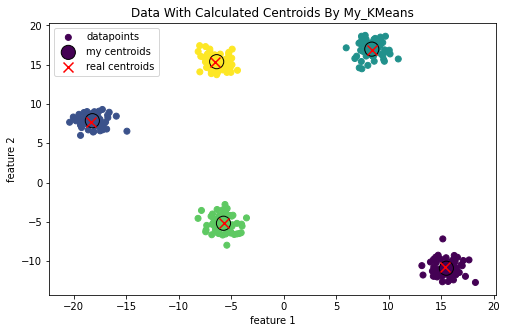

In [7]:
plt.figure(figsize=(8,5))
plt.title("Data With Calculated Centroids By My_KMeans")

plt.scatter(df.iloc[:,0], df.iloc[:,1], label="datapoints", c=my_labels)
plt.scatter(my_centroids.iloc[:,0], my_centroids.iloc[:,1], label="my centroids", s=200, edgecolors="k", c=range(n_clusters))
plt.scatter(real_centroids[:,0], real_centroids[:,1], c="r", marker="x", s=100, label="real centroids")

plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend();

# Comparing with KMeans from sklearn

In [8]:
from sklearn.cluster import KMeans

# Creating instance of a class
kmeans = KMeans(n_clusters=n_clusters)

# Fitting the data
kmeans.fit(df)

KMeans(n_clusters=5)

In [9]:
# Getting positions of centroids
centroids = kmeans.cluster_centers_

# Getting lebals of points
labels = kmeans.labels_

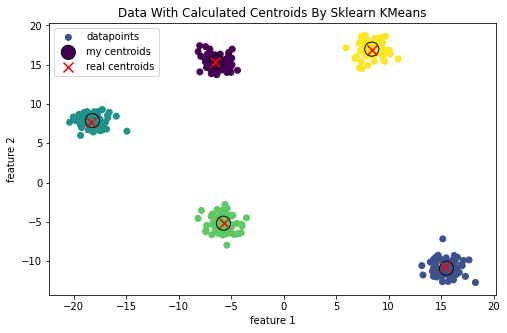

In [10]:
plt.figure(figsize=(8,5))
plt.title("Data With Calculated Centroids By Sklearn KMeans")

plt.scatter(df.iloc[:,0], df.iloc[:,1], label="datapoints", c=labels)
plt.scatter(centroids[:,0], centroids[:,1], label="my centroids", s=200, edgecolors="k", c=range(n_clusters))
plt.scatter(real_centroids[:,0], real_centroids[:,1], c="r", marker="x", s=100, label="real centroids")

plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend();

My Algorythm could be much faster if I would implement everythink in numpy.